# Books

In [37]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [38]:
books = pd.read_csv('/content/drive/MyDrive/Colab/Dataset/AssociationRules/book.csv')
books.head(5)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


## EDA

In [39]:
books.shape

(2000, 11)

In [40]:
books = books.dropna()
books.shape

(2000, 11)

## Apriori algorithm

In [41]:
freq_books = apriori(books, min_support=0.5, use_colnames=True)
freq_books

,support,itemsets


In [42]:
freq_books = apriori(books, min_support=0.3, use_colnames=True)
freq_books

,support,itemsets
0,0.423,(ChildBks)
1,0.431,(CookBks)


In [43]:
freq_books = apriori(books, min_support=0.1, use_colnames=True)
freq_books

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


## Rule generation

In [44]:
rules = association_rules(freq_books, metric = 'lift', min_threshold = 0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [45]:
support = rules['support']
support.to_numpy()

confidence = rules['confidence']
confidence.to_numpy()

array([0.39007092, 0.66666667, 0.59396752, 0.60520095, 0.43498818,
       0.65248227, 0.35815603, 0.70629371, 0.67427386, 0.38416076,
       0.46099291, 0.70652174, 0.37587007, 0.65454545, 0.40957447,
       0.46666667, 0.41908714, 0.40808081, 0.4365942 , 0.48686869,
       0.4350348 , 0.66489362, 0.35382831, 0.71095571, 0.69294606,
       0.387471  , 0.44663573, 0.69746377, 0.26334107, 1.        ,
       0.49184149, 0.37411348, 0.51244813, 0.43794326, 0.48007246,
       0.46985816, 0.40036232, 0.51515152, 0.52904564, 0.46195652,
       0.50390625, 0.7962963 , 0.78181818, 0.29930394, 0.30496454,
       0.52121212, 0.5703125 , 0.77866667, 0.79347826, 0.3387471 ,
       0.34515366, 0.5177305 , 0.47851562, 0.80327869, 0.80858086,
       0.28422274, 0.28959811, 0.57109557, 0.75748503, 0.77846154,
       0.49414062, 0.52489627, 0.29350348, 0.29905437, 0.58398438,
       0.77662338, 0.76666667, 0.34686775, 0.3534279 , 0.54166667,
       0.53589744, 0.56793478, 0.78867925, 0.24704492, 0.37862

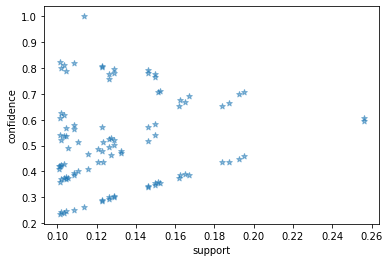

In [46]:
import matplotlib.pyplot as plt

plt.scatter(support, confidence, alpha = 0.5, marker = '*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [47]:
rules.sort_values('lift', ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
84,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
99,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
94,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
96,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


# MyMovies

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [17]:
movies = pd.read_csv('/content/drive/MyDrive/Colab/Dataset/AssociationRules/my_movies.csv')
movies.head(5)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [19]:
movies = movies.drop(['V1', 'V2', 'V3', 'V4', 'V5'], axis = 1)
movies.head(5)

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


## Apriori algorithm



In [26]:
freq_movies = apriori(movies, min_support=0.5, use_colnames=True)
freq_movies

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.6,"(Gladiator, Patriot)"


In [27]:
freq_movies = apriori(movies, min_support=0.3, use_colnames=True)
freq_movies

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Gladiator, Sixth Sense, Patriot)"


In [20]:
freq_movies = apriori(movies, min_support=0.1, use_colnames=True)
freq_movies

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


## Rule generation

In [22]:
movie_rules = association_rules(freq_books, metric = 'lift', min_threshold = 0.7)
movie_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.612500,0.450000,0.300000,0.489796,1.088435,0.024375,1.078000
1,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500
2,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013
3,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625
4,(ChildBks),(DoItYBks),0.612500,0.490625,0.315625,0.515306,1.050305,0.015117,1.050921
...,...,...,...,...,...,...,...,...,...
951,"(CookBks, ItalCook)","(ArtBks, ItalArt)",0.334375,0.190625,0.128125,0.383178,2.010112,0.064385,1.312169
952,(ArtBks),"(ItalArt, ItalCook, CookBks)",0.556250,0.128125,0.128125,0.230337,1.797753,0.056855,1.132801
953,(ItalArt),"(ArtBks, CookBks, ItalCook)",0.190625,0.193750,0.128125,0.672131,3.469064,0.091191,2.459062
954,(ItalCook),"(ArtBks, ItalArt, CookBks)",0.334375,0.146875,0.128125,0.383178,2.608869,0.079014,1.383097


In [ ]:
support = movie_rules['support']
support.to_numpy()

confidence = movie_rules['confidence']
confidence.to_numpy()

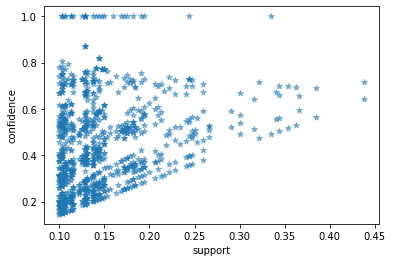

In [34]:
import matplotlib.pyplot as plt

plt.scatter(support, confidence, alpha = 0.5, marker = '*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [23]:
rules.sort_values('lift', ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
950,"(ItalArt, CookBks)","(ArtBks, ItalCook)",0.146875,0.193750,0.128125,0.872340,4.502402,0.099668,6.315625
947,"(ArtBks, ItalCook)","(ItalArt, CookBks)",0.193750,0.146875,0.128125,0.661290,4.502402,0.099668,2.518750
944,"(ArtBks, CookBks, ItalCook)",(ItalArt),0.193750,0.190625,0.128125,0.661290,3.469064,0.091191,2.389583
503,"(ArtBks, ItalCook)",(ItalArt),0.193750,0.190625,0.128125,0.661290,3.469064,0.091191,2.389583
506,(ItalArt),"(ArtBks, ItalCook)",0.190625,0.193750,0.128125,0.672131,3.469064,0.091191,2.459062
953,(ItalArt),"(ArtBks, CookBks, ItalCook)",0.190625,0.193750,0.128125,0.672131,3.469064,0.091191,2.459062
434,(ItalCook),"(ItalArt, CookBks)",0.334375,0.146875,0.128125,0.383178,2.608869,0.079014,1.383097
943,"(ArtBks, ItalArt, CookBks)",(ItalCook),0.146875,0.334375,0.128125,0.872340,2.608869,0.079014,5.214062
431,"(ItalArt, CookBks)",(ItalCook),0.146875,0.334375,0.128125,0.872340,2.608869,0.079014,5.214062
954,(ItalCook),"(ArtBks, ItalArt, CookBks)",0.334375,0.146875,0.128125,0.383178,2.608869,0.079014,1.383097
